In [2]:
import pandas as pd 

In [3]:
df=pd.read_csv('HousePrices.csv')
df

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,942,60,RL,NaN,8755,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2009,WD,Normal,214000
2069,943,90,RL,63.0,7711,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,Oth,Abnorml,150000
2070,944,90,RL,313.0,25000,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,143000
2071,945,20,RL,52.0,14375,Pave,NaN,IR1,Lvl,NoSeWa,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500


In [4]:
df.isnull().sum()

Id                       0
Dwell_Type               0
Zone_Class               0
LotFrontage            320
LotArea                  0
                      ... 
MoSold                   0
YrSold                   0
SaleType                 0
SaleCondition            0
Property_Sale_Price      0
Length: 81, dtype: int64

In [5]:
missing_df = pd.DataFrame(df.isnull().sum(), columns=['MissingValues'])
missing_df = missing_df[missing_df['MissingValues'] > 0].sort_values(by='MissingValues', ascending=False)
print(missing_df)


              MissingValues
PoolQC                 2065
MiscFeature            1993
Alley                  1944
Fence                  1669
MasVnrType             1247
FireplaceQu             988
LotFrontage             320
GarageType              113
GarageYrBlt             113
GarageFinish            113
GarageQual              113
GarageCond              113
BsmtExposure             61
BsmtFinType2             60
BsmtQual                 59
BsmtCond                 59
BsmtFinType1             59
MasVnrArea               14
Electrical                1


In [6]:
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)


In [7]:
cat_cols = ['MasVnrType', 'FireplaceQu', 'GarageType', 'GarageFinish',
            'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2',
            'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'Electrical']

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\CM\AppData\Local\Temp\ipykernel_11612\2765624705.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [8]:
num_cols = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\CM\AppData\Local\Temp\ipykernel_11612\3543920335.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [9]:
df.isnull().sum().sum()

np.int64(0)

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoders={}
for col in df.select_dtypes(include='object').columns:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
    label_encoders[col]=le

In [11]:
df

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Property_Shape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,942,60,3,70.0,8755,1,0,3,0,2,...,0,168,0,0,0,6,2009,8,4,214000
2069,943,90,3,63.0,7711,1,0,3,0,4,...,0,0,0,0,0,8,2007,7,0,150000
2070,944,90,3,313.0,25000,1,3,2,0,4,...,0,0,0,0,0,6,2007,8,4,143000
2071,945,20,3,52.0,14375,1,0,3,1,1,...,0,0,233,0,0,1,2009,0,0,137500


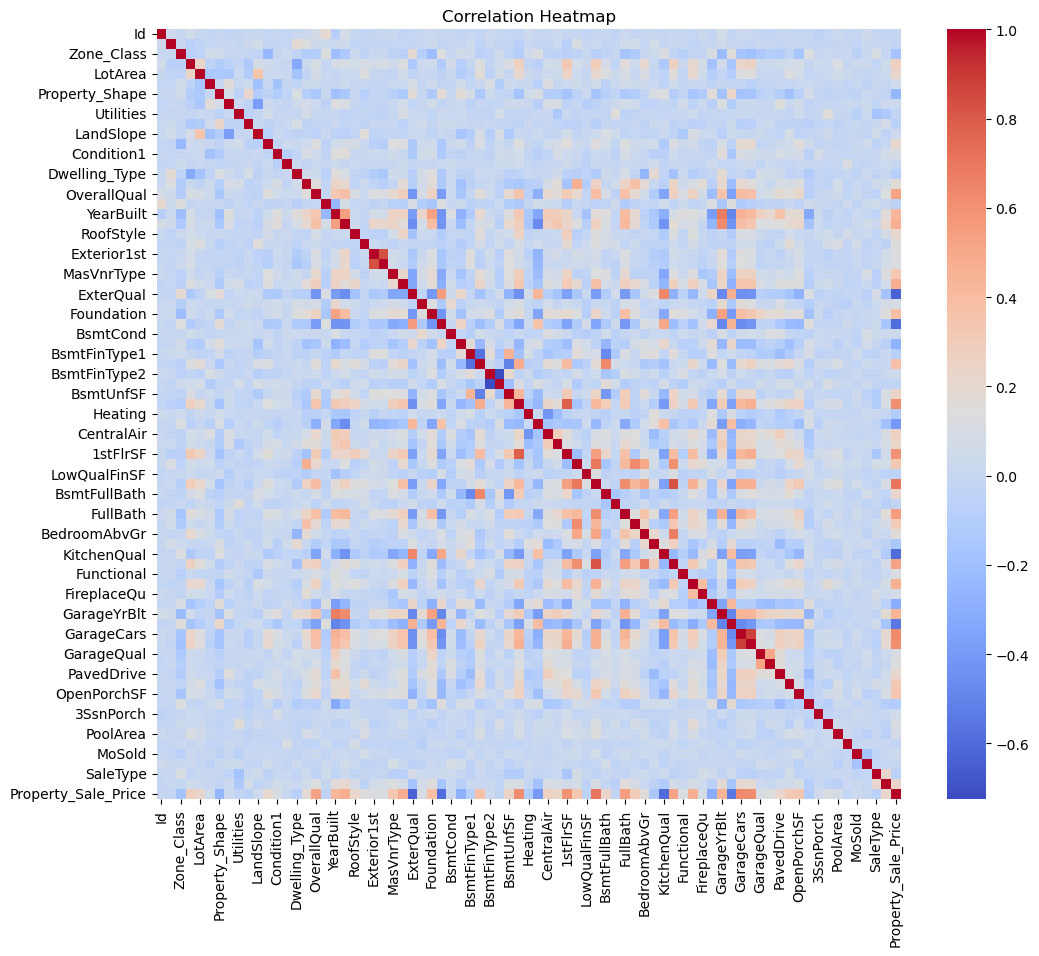

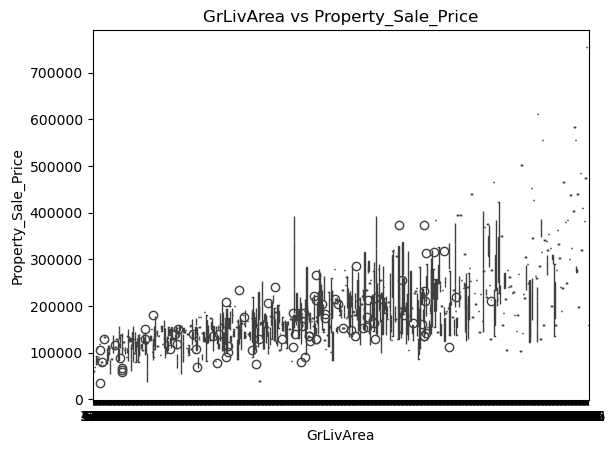

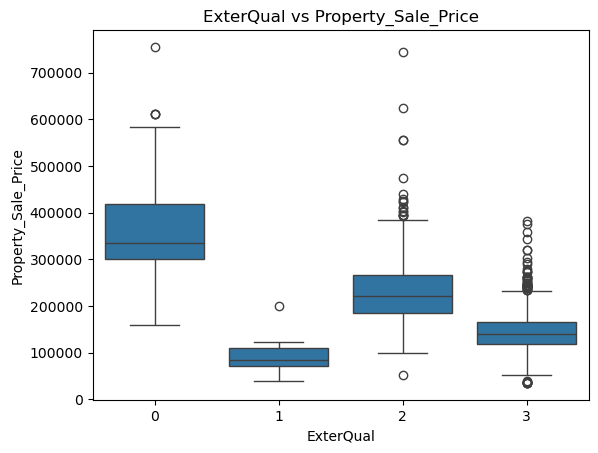

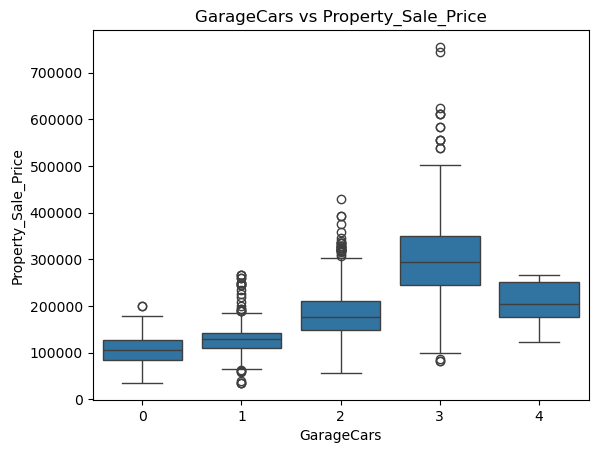

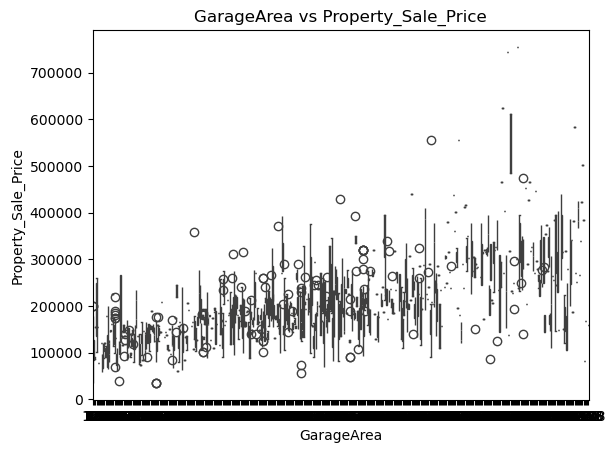

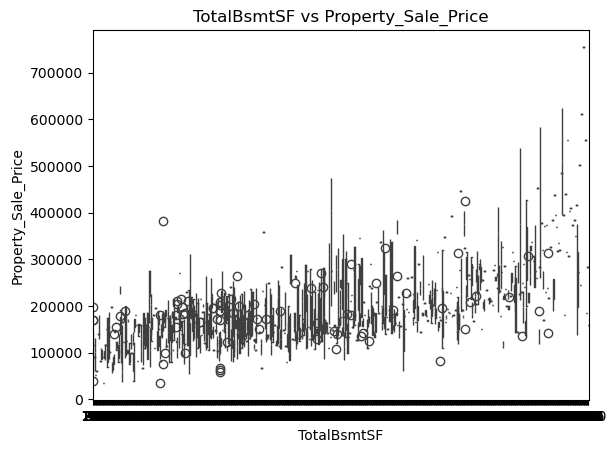

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()
top_corr = df.corr(numeric_only=True)['Property_Sale_Price'].abs().sort_values(ascending=False)[1:6]
for col in top_corr.index:
    sns.boxplot(x=df[col], y=df['Property_Sale_Price'])
    plt.title(f'{col} vs Property_Sale_Price')
    plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

In [14]:
X=df.drop(['Property_Sale_Price'], axis=1)
y=df['Property_Sale_Price']
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

#GradientBoosting
gd=GradientBoostingRegressor()
gd.fit(X_train,y_train)
y_pred_gd=gd.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
print('Linear Regression:')
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2:',np.sqrt(r2_score(y_test,y_pred)))

print('\n Gradient Boosting:')
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred_gd)))
print('R2:',np.sqrt(r2_score(y_test,y_pred_gd)))

Linear Regression:
RMSE: 35347.04522109378
R2: 0.8866980361122818

 Gradient Boosting:
RMSE: 23039.728325103828
R2: 0.9535085605511443


Text(0.5, 1.0, 'Linear Regression')

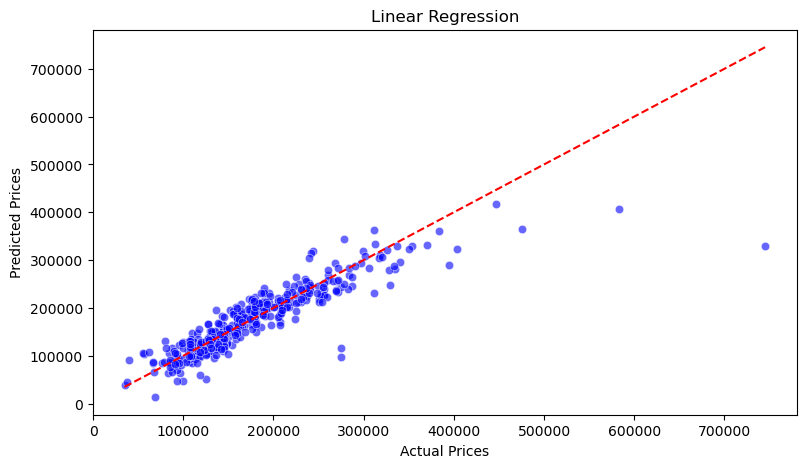

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression')

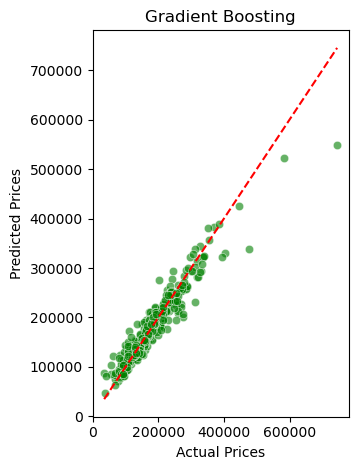

In [17]:
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_gd, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Gradient Boosting')

plt.tight_layout()
plt.show()

In [18]:
y_pred_gd

array([120706.91181652, 119258.61197334, 138755.63144242, 260402.43094442,
       240654.62399617, 128165.10153873, 200516.27065866, 133309.82566738,
       217864.96599043, 135257.97502665, 137554.21436438, 123742.8265025 ,
       131301.12599897, 210448.94980398, 522317.24262222, 293363.83516715,
        95974.68585331, 150181.18165199, 155094.50336546, 249494.54512568,
       123909.08530986, 321659.88000137, 143494.98412108, 120190.16217999,
       220125.97656453, 228333.77515685,  96445.72336748, 219593.11854623,
        71539.05995109, 142151.91445912, 277673.65451644, 156486.95631861,
       138612.54364073, 424922.24329831, 197632.18804735, 186502.72803005,
       255022.3165871 , 247527.97254631, 265581.14342852,  99662.85105947,
        89215.09514741, 343930.81957446, 118473.76441479, 131348.12104697,
       136523.36191667, 144329.82219212,  75798.23264008, 152322.51387558,
       112080.55184944, 244119.68779361, 160565.91838913, 111695.08705943,
       218608.71595022, 2